In [640]:
import pandas as pd
##%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects
import streamlit as st

In [641]:
##st.text('Fixed width text')
##st.markdown('_Markdown_') # see #*
##st.caption('Balloons. Hundreds of them...')
##st.latex(r''' e^{i\pi} + 1 = 0 ''')
##st.write('Most objects') # df, err, func, keras!
##st.write(['st', 'is <', 3]) # see *
st.title('Computer Science Capstone — C964')
st.header('Student – Mark Nefzger')
st.header('Student ID: 001411596')
##st.subheader('My sub')
##st.code('for i in range(8): foo()')

DeltaGenerator()

In [642]:
pd_ver = pd.__version__
st.write("Pandas version: ", pd_ver)

In [643]:
np_ver = np.__version__
st.write("Numpy version: ", np_ver)

In [644]:
st_ver = st.__version__
st.write("Streamlit version: ", st_ver)

In [645]:
plt_ver = matplotlib.__version__
st.write("Matplotlib version: ", plt_ver)

## Import data

In [646]:
# Import Data
health_data = pd.read_csv("New Data/oura_2019-01-01_2023-09-09_trends_Original.csv")

## View data

In [647]:
st.header('Imported Data')

DeltaGenerator()

In [648]:
health_data

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2021-01-13,83.0,79.0,100.0,60.0,96.0,75.0,83.0,100.0,25500.0,27960.0,2460.0,9990.0,12540.0,2970.0,235.0,91.0,540.0,13890.0,2021-01-12T20:58:31.000-07:00,2021-01-13T04:44:31.000-07:00,76.91,68.0,16.0,0.03,NaN,15.625,94,69.0,95.0,95.0,100.0,100.0,716,2768,9892,13824,36360,28200,15000,6780,60,0,1.65625,1,81.0,76.0,NaN,NaN,NaN,100.0,74.0,NaN,99.0
1,2021-01-14,76.0,67.0,95.0,46.0,93.0,79.0,72.0,100.0,22740.0,25560.0,2820.0,6420.0,13980.0,2340.0,237.0,89.0,270.0,12900.0,2021-01-13T21:35:07.000-07:00,2021-01-14T04:41:07.000-07:00,64.48,59.0,20.0,-0.28,0.02,16.000,91,47.0,100.0,95.0,100.0,99.0,488,2670,10903,9223,46680,13200,23160,3360,0,0,1.62500,0,81.0,71.0,NaN,90.0,NaN,92.0,93.0,NaN,69.0
2,2021-01-15,78.0,72.0,98.0,95.0,100.0,79.0,67.0,49.0,23760.0,24840.0,1080.0,7980.0,11010.0,4770.0,251.0,96.0,150.0,12210.0,2021-01-15T01:17:22.000-07:00,2021-01-15T08:11:22.000-07:00,83.52,77.0,13.0,0.24,0.33,17.125,95,77.0,95.0,95.0,100.0,100.0,1474,3568,14215,27529,30720,21840,15420,8400,5520,4500,2.12500,1,80.0,75.0,85.0,86.0,88.0,76.0,57.0,NaN,96.0
3,2021-01-16,69.0,69.0,97.0,60.0,98.0,70.0,67.0,27.0,23190.0,25080.0,1890.0,7530.0,12690.0,2970.0,241.0,92.0,150.0,12180.0,2021-01-16T02:02:00.000-07:00,2021-01-16T09:00:00.000-07:00,78.64,71.0,15.0,0.05,0.34,16.500,97,77.0,100.0,100.0,100.0,100.0,372,2403,8606,7090,31500,35040,17700,2100,60,0,1.40625,0,64.0,60.0,84.0,11.0,58.0,98.0,81.0,NaN,51.0
4,2021-01-17,78.0,73.0,98.0,43.0,95.0,86.0,70.0,87.0,24060.0,26820.0,2760.0,8160.0,13740.0,2160.0,174.0,90.0,210.0,12840.0,2021-01-16T23:50:45.000-07:00,2021-01-17T07:17:45.000-07:00,67.83,59.0,28.0,-0.12,0.18,16.500,93,70.0,78.0,100.0,100.0,100.0,438,2435,5786,8355,35460,36540,9960,4380,60,0,1.43750,2,78.0,74.0,85.0,97.0,72.0,100.0,83.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2023-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,100.0,95.0,43.0,71.0,67.0,129,2083,2836,2590,16980,20820,6120,420,0,42060,1.21875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,2023-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,100.0,100.0,60.0,96.0,96.0,420,2499,8834,8084,13140,20700,22560,1440,60,28500,1.46875,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2023-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,100.0,100.0,60.0,71.0,68.0,1,1889,30,29,840,22980,120,0,0,62460,1.12500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2023-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,68.0,95.0,60.0,71.0,91.0,235,2295,5656,4575,36120,22140,11100,1380,0,15660,1.34375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Describe Data

In [649]:
# health_data.dtypes;

## Set up dataframe

In [650]:
df = pd.DataFrame(health_data)

## Convert Sleep Duration and Rest Time to hours

In [651]:
df["Total Sleep Duration"] = df["Total Sleep Duration"] / 3600
df["Rest Time"] = df["Rest Time"] / 3600

In [652]:
pd.crosstab(df["Total Sleep Duration"] > 7, df["Readiness Score"] >85)

Readiness Score,False,True
Total Sleep Duration,,
False,493,47
True,279,151


<Axes: >

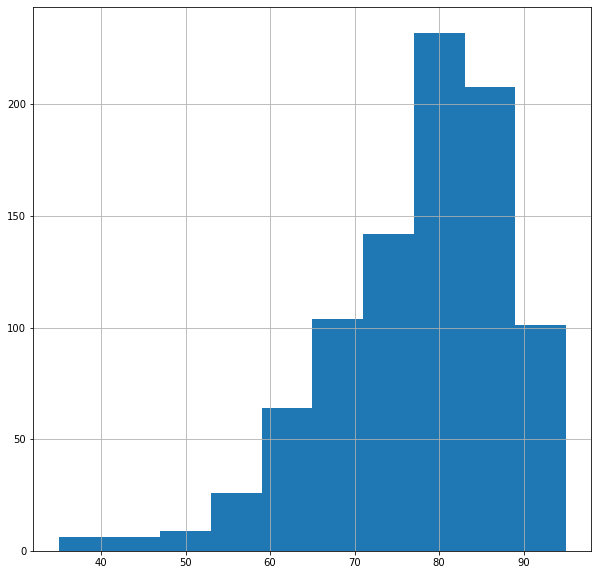

In [653]:
df["Readiness Score"].hist(figsize=(10, 10))

## Manipulating Data

In [654]:
df.dropna(inplace=True)

In [655]:
# Randomize data 1 = 100%
df.sample(frac=1)

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
811,2023-06-08,90.0,93.0,100.0,85.0,100.0,82.0,70.0,100.0,7.583333,28860.0,1560.0,11460.0,12570.0,3270.0,155.0,95.0,270.0,14490.0,2023-06-07T21:56:46.000-06:00,2023-06-08T05:57:46.000-06:00,72.66,61.0,11.0,0.06,0.10,16.250,74,59.0,100.0,43.0,71.0,80.0,391,2530,8846,7200,41160,6.316667,20460,2040,0,0,1.50000,0,78.0,87.0,96.0,97.0,89.0,99.0,87.0,57.0,28.0
239,2021-09-21,77.0,73.0,88.0,27.0,90.0,91.0,70.0,100.0,6.316667,25800.0,3060.0,5280.0,16380.0,1080.0,193.0,88.0,240.0,12630.0,2021-09-20T21:55:38.000-06:00,2021-09-21T05:05:38.000-06:00,64.59,58.0,20.0,-0.10,-0.01,16.375,92,59.0,100.0,95.0,100.0,98.0,406,2432,9095,7928,41040,8.083333,12540,3480,240,0,1.43750,0,83.0,69.0,83.0,100.0,58.0,100.0,89.0,89.0,89.0
667,2022-12-25,94.0,97.0,100.0,97.0,95.0,89.0,89.0,90.0,8.141667,32700.0,3390.0,10020.0,14040.0,5250.0,172.0,90.0,690.0,17190.0,2022-12-24T22:32:04.000-07:00,2022-12-25T07:37:04.000-07:00,67.50,58.0,19.0,0.15,0.02,16.500,85,70.0,100.0,60.0,100.0,96.0,585,2781,12626,11512,35520,6.033333,26340,2820,0,0,1.65625,0,92.0,100.0,100.0,100.0,94.0,92.0,98.0,87.0,49.0
150,2021-06-16,78.0,79.0,98.0,31.0,83.0,74.0,83.0,100.0,7.091667,30060.0,4530.0,7680.0,16230.0,1620.0,241.0,85.0,1230.0,14460.0,2021-06-15T20:41:32.000-06:00,2021-06-16T05:02:32.000-06:00,71.31,64.0,17.0,0.13,0.28,16.875,93,60.0,100.0,100.0,100.0,100.0,496,2569,11840,10058,40980,6.516667,17520,4440,0,0,1.53125,0,80.0,68.0,78.0,79.0,78.0,94.0,78.0,86.0,100.0
284,2021-11-06,62.0,67.0,97.0,72.0,58.0,57.0,70.0,1.0,6.083333,30480.0,8580.0,7260.0,11760.0,2880.0,253.0,72.0,240.0,13260.0,2021-11-06T06:13:23.000-06:00,2021-11-06T14:41:23.000-06:00,87.44,79.0,11.0,1.63,0.68,18.250,92,80.0,100.0,95.0,96.0,99.0,167,2100,3640,3155,31800,12.166667,9300,480,0,1020,1.21875,0,35.0,33.0,100.0,35.0,79.0,1.0,1.0,71.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021-05-17,69.0,61.0,80.0,15.0,83.0,77.0,81.0,100.0,5.858333,24900.0,3810.0,5340.0,15000.0,750.0,194.0,85.0,450.0,13410.0,2021-05-16T22:03:38.000-06:00,2021-05-17T04:58:38.000-06:00,70.43,60.0,18.0,0.07,0.14,17.500,87,73.0,100.0,100.0,100.0,100.0,667,2704,11305,13483,34440,7.916667,17160,6300,0,0,1.59375,0,77.0,45.0,85.0,94.0,73.0,99.0,95.0,83.0,51.0
260,2021-10-12,87.0,79.0,96.0,84.0,98.0,86.0,86.0,100.0,6.691667,25800.0,1710.0,6660.0,14100.0,3330.0,261.0,93.0,600.0,12750.0,2021-10-11T21:52:25.000-06:00,2021-10-12T05:02:25.000-06:00,64.20,59.0,25.0,-0.02,0.17,16.500,95,72.0,100.0,100.0,100.0,100.0,507,2566,10324,9880,34920,8.583333,16560,3780,240,0,1.50000,0,85.0,94.0,77.0,73.0,72.0,100.0,94.0,91.0,93.0
77,2021-04-02,79.0,80.0,98.0,84.0,100.0,80.0,67.0,41.0,7.183333,27240.0,1380.0,7710.0,14040.0,4110.0,203.0,95.0,150.0,13410.0,2021-04-02T01:12:02.000-06:00,2021-04-02T08:46:02.000-06:00,74.74,67.0,13.0,0.18,0.18,16.875,87,81.0,100.0,60.0,100.0,98.0,761,2941,18278,15403,31680,5.233333,3

In [656]:
# Reset index if necessary
# df.reset_index(drop=True, inplace=True)

## Matplotlib

In [ ]:
# 1. Prepare data
x = df["Total Sleep Duration"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Total Sleep Duration",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_1.png")

In [ ]:
# 1. Prepare data
x = df["Previous Night Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)


# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Previous Night Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_2.png")

In [ ]:
# 1. Prepare data
x = df["Move Every Hour Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Move Every Hour Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_3.png")

In [ ]:
# 1. Prepare data
x = df["Non-wear Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Non-wear Time",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_4.png")

In [ ]:
# 1. Prepare data
x = df["Rest Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Rest Time",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_5.png")

In [ ]:
# 1. Prepare data
x = df["Previous Day Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Previous Day Activity Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_6.png")

In [ ]:
# 1. Prepare data
x = df["Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Activity Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_7.png")

In [ ]:
# 1. Prepare data
x = df["Resting Heart Rate Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Resting Heart Rate Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_8.png")

In [ ]:
# 1. Prepare data
x = df["Temperature Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Temperature Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_9.png")

In [ ]:
# 1. Prepare data
x = df["HRV Balance Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="HRV Balance Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
fig.savefig("Figures/Figure_10.png")

In [ ]:
st.image('Figures/Figure_1.png')
st.image('Figures/Figure_8.png')
st.image('Figures/Figure_10.png')

## Remove data columns that are lagging data fields or not necessary

In [ ]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,53]], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Average Readiness Score
df["Readiness Score"].mean()

In [ ]:
len(df)

## Algorithm/Estimator

In [ ]:
# Import algorithm/estimator

# Instantiate and fit the model (on the training set)
# Try RandomForest estimator


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Setup random seed
np.random.seed(42)

# Create the data
df.dropna(inplace=True)
X = df.drop("Readiness Score", axis=1)
y = df["Readiness Score"] #target

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
model.get_params()

In [ ]:
model.fit(X_train, y_train);

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
# Try Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

In [ ]:
model.get_params()

In [ ]:
from sklearn import linear_model
model = linear_model.LassoLars(alpha=1.0)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

## Make Predictions Using Machine Language Model

In [ ]:
test_data = pd.read_csv("New Data/oura_2023-09-17_2023-09-17_trends.csv")

In [ ]:
test_data.drop(test_data.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,53]], axis=1, inplace=True)
test_data.info()

In [ ]:
## Remove Readiness Score
test_data.drop(test_data.columns[2], axis=1, inplace=True)
test_data.info()

In [ ]:
test_data.info()

In [ ]:
## Convert Total Sleep Duration to hours
test_data["Total Sleep Duration"] = test_data["Total Sleep Duration"] / 3600

In [ ]:
value = st.slider(
    'Select a estimated sleep',
    4.0, 12.0, 8.0)
st.write('Estimated Sleep:', value)
test_data["Total Sleep Duration"] = value

In [ ]:
st.write('Based on your estimated sleep, your readiness score is prediced to be: ', model.predict(test_data))
st.header('Based on your estimated sleep, your readiness score is prediced to be: '), st.markdown(model.predict(test_data))

In [ ]:
sleep_hours_pred = float(input("How many hours of planned sleep? "))
print(sleep_hours_pred)

In [ ]:
test_data

In [ ]:
test_data["Total Sleep Duration"] = sleep_hours_pred
test_data

In [ ]:
model.predict(test_data)

In [ ]:
!jupyter nbconvert --to script Capstone.ipynb
with open('Capstone.py', 'r') as f:
    lines = f.readlines()
with open('Capstone.py', 'w') as f:
    for line in lines:
        if 'nbconvert --to script' in line:
            break
        else:
            f.write(line)